<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project1</h3>
</div>

<img src = "https://www.eesc.europa.eu/sites/default/files/styles/large/public/images/shutterstock_1642888921.jpg?itok=P9-6YhGd" width=50%>

## Importing the libraries

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Additional libraries for machine learning and preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load and Prepare Data

In [2]:
# Load the dataset
churn_df = pd.read_csv('/content/Churn.csv')



## EDA

In [3]:

# Exploratory Data Analysis (EDA)
# Display the first few rows of the dataset
print(churn_df.head())

# Display basic information about the dataset
print(churn_df.info())

# Display summary statistics for numerical columns
print(churn_df.describe())

# Check for missing values in the dataset
missing_values = churn_df.isnull().sum()
print("Missing values:\n", missing_values)

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

## Data Preprocessing

In [4]:
# Step 3: Identifying missing data (Missing Values)
# Check for missing values in the dataset
missing_values = churn_df.isnull().sum()
print("Missing values:\n", missing_values)
# Data Cleaning Actions
# In this case, we don't need further cleaning as no missing values were found.

# Applying Scaling if necessary
# Separating numerical features for scaling
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Initializing the scaler
scaler = StandardScaler()

# Applying scaling to the numerical features
churn_df[numerical_features] = scaler.fit_transform(churn_df[numerical_features])

# Display the first few rows after scaling to confirm
print(churn_df.head())


Missing values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender       Age  \
0          1    15634602  Hargrave    -0.326221    France  Female  0.293517   
1          2    15647311      Hill    -0.440036     Spain  Female  0.198164   
2          3    15619304      Onio    -1.536794    France  Female  0.293517   
3          4    15701354      Boni     0.501521    France  Female  0.007457   
4          5    15737888  Mitchell     2.063884     Spain  Female  0.388871   

     Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0 -1.041760 -1.225848      -0.911583          1               1   
1 -1.387538  0.117350      -0.911583          0               1   


## Strorytelling - Visualization

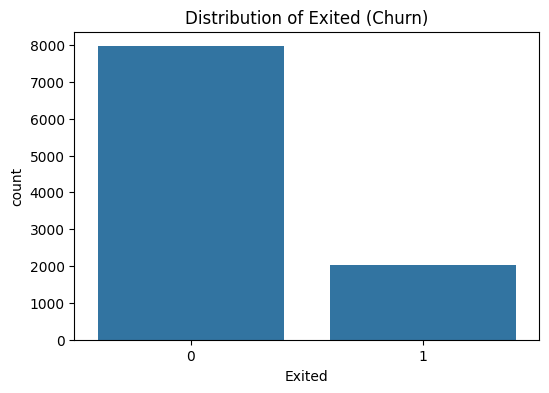

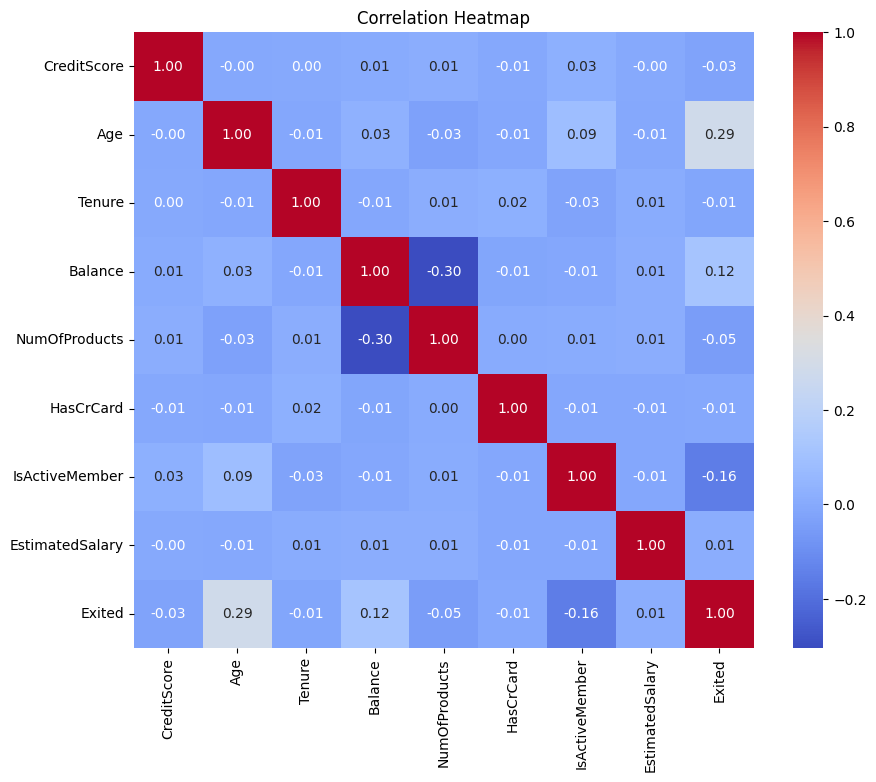

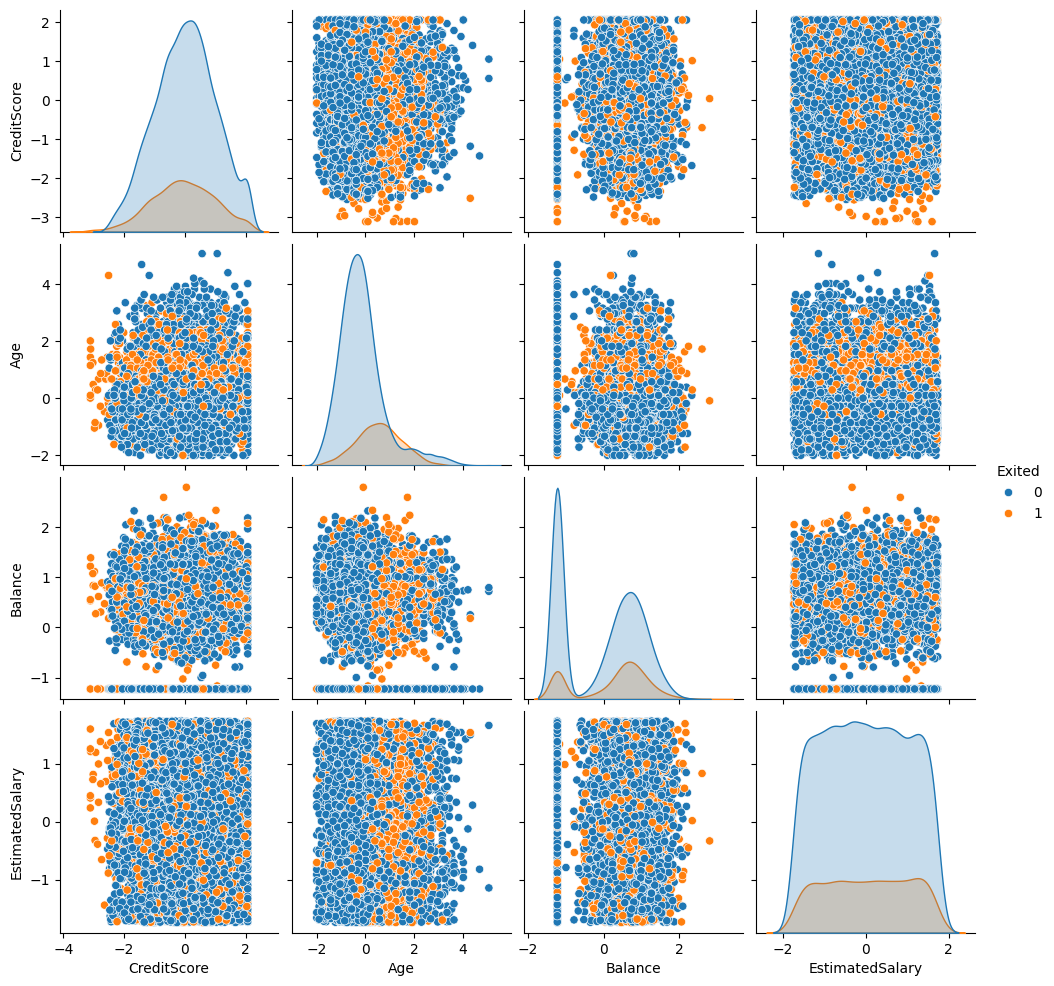

In [10]:
# Step 5: Plotting various charts for better understanding of the data

# 1. Distribution of the target variable 'Exited'
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=churn_df)
plt.title('Distribution of Exited (Churn)')
plt.show()

# 2. Correlation heatmap of the numerical features
# Dropping categorical columns like 'Surname' and keeping only numerical features
numerical_churn_df = churn_df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'])

# Calculate correlation matrix for numerical columns
plt.figure(figsize=(10, 8))
correlation_matrix = numerical_churn_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 3. Pairplot to visualize relationships between features and the target variable
sns.pairplot(churn_df, hue='Exited', vars=['CreditScore', 'Age', 'Balance', 'EstimatedSalary'])
plt.show()



## Prepare Data for Machine learning

In [12]:
# Encoding categorical variables
# Label encoding for 'Gender' and One-hot encoding for 'Geography'
label_encoder = LabelEncoder()
churn_df['Gender'] = label_encoder.fit_transform(churn_df['Gender'])  # Converts 'Male'/'Female' to 0/1

# One-hot encoding for 'Geography'
churn_df = pd.get_dummies(churn_df, columns=['Geography'], drop_first=True)  # Converts 'Geography' to dummy variables

# Defining the features (X) and the target variable (y)
X = churn_df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)  # Removing unnecessary columns
y = churn_df['Exited']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the scaler
scaler = StandardScaler()

# Fitting the scaler on the training data and transforming both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now the data is ready for training a model
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)



X_train_scaled shape: (8000, 11)
X_test_scaled shape: (2000, 11)


## Train your model

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



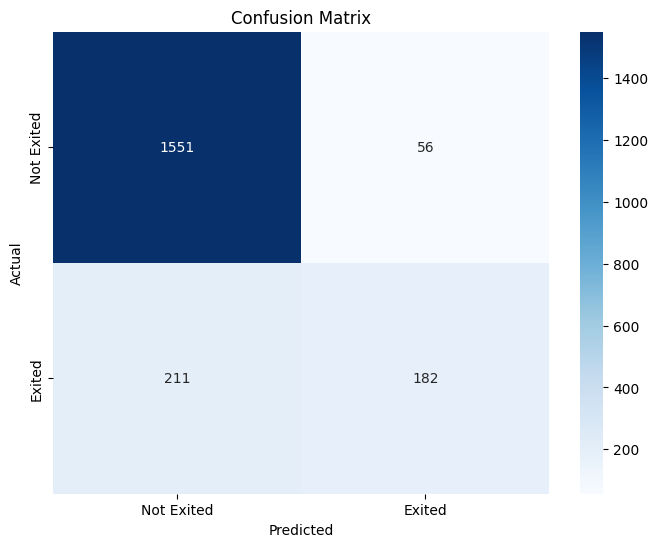

In [16]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 6: Model implementation and training
# Initialize the RandomForestClassifier model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model_rf.predict(X_test_scaled)

# Step 6: Evaluation Metrics
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


## Test the model and show the metrics

In [17]:
pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [2]:
from pycaret.classification import *

In [5]:
# Initialize the PyCaret classification setup
clf_setup = setup(data=churn_df,
                  target='Exited',
                  ignore_features=['RowNumber', 'CustomerId', 'Surname'],
                  categorical_features=['Gender', 'Geography'],
                  session_id=42)

# Compare different models and find the best one
best_model = compare_models()

# Display the best model
print(best_model)


,Description,Value
0,Session id,42
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(10000, 14)"
4,Transformed data shape,"(10000, 13)"
5,Transformed train set shape,"(7000, 13)"
6,Transformed test set shape,"(3000, 13)"
7,Ignore features,3
8,Numeric features,8
9,Categorical features,2


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8613,0.8594,0.4509,0.7744,0.5683,0.4928,0.5192,1.0460
rf,Random Forest Classifier,0.8583,0.8456,0.4488,0.7580,0.5625,0.4847,0.5091,1.1920
lightgbm,Light Gradient Boosting Machine,0.8560,0.8522,0.4810,0.7210,0.5762,0.4937,0.5088,1.3340
ada,Ada Boost Classifier,0.8503,0.8360,0.4396,0.7145,0.5429,0.4599,0.4798,0.4790
et,Extra Trees Classifier,0.8466,0.8373,0.4109,0.7150,0.5210,0.4377,0.4619,0.9520
xgboost,Extreme Gradient Boosting,0.8443,0.8326,0.4831,0.6614,0.5580,0.4663,0.4750,0.2570
lr,Logistic Regression,0.8111,0.7496,0.1957,0.6200,0.2967,0.2202,0.2699,1.4680
lda,Linear Discriminant Analysis,0.8067,0.7561,0.2160,0.5698,0.3126,0.2259,0.2623,0.1090
ridge,Ridge Classifier,0.8037,0.7561,0.1024,0.6130,0.1750,0.1237,0.1898,0.1050
dummy,Dummy Classifier,0.7963,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1020


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [7]:
# Train the best model
final_model = finalize_model(best_model)

# Display the best model
print(final_model)

# Evaluate the finalized model on test set
predictions = predict_model(final_model)

# Display the performance metrics
print(predictions)

# If you want a detailed classification report
evaluate_model(final_model)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['CreditScore', 'Age', 'Tenure',
                                             'Balance', 'NumOfProducts',
                                             'HasCrCard', 'IsActiveMember',
                                             'EstimatedSalary'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('ca...
                                            criterion='friedman_mse', 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8833,0.8992,0.5401,0.8271,0.6535,0.5870,0.6063


      CreditScore Geography  Gender  Age  Tenure        Balance  \
6417          790     Spain    Male   37       6       0.000000   
199           521    France    Male   35       6   96423.843750   
2051          712    France  Female   37       1  106881.500000   
8481          729     Spain  Female   38      10       0.000000   
1071          695   Germany    Male   52       8  103023.257812   
...           ...       ...     ...  ...     ...            ...   
9593          738    France  Female   67       1  130652.523438   
7289          627     Spain  Female   35       7       0.000000   
4728          501   Germany    Male   40       5  114655.578125   
3617          792   Germany  Female   29       4  107601.789062   
9704          625    France    Male   22       9       0.000000   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
6417              2          1               1    119484.007812       0   
199               1          1               

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…



```
# This is formatted as code
```

## Save your final model

In [8]:
# Save the final model
save_model(final_model, 'final_churn_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['CreditScore', 'Age', 'Tenure',
                                              'Balance', 'NumOfProducts',
                                              'HasCrCard', 'IsActiveMember',
                                              'EstimatedSalary'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('ca...
                                             criterion='

## Send us the Result (Maktabkhoone)